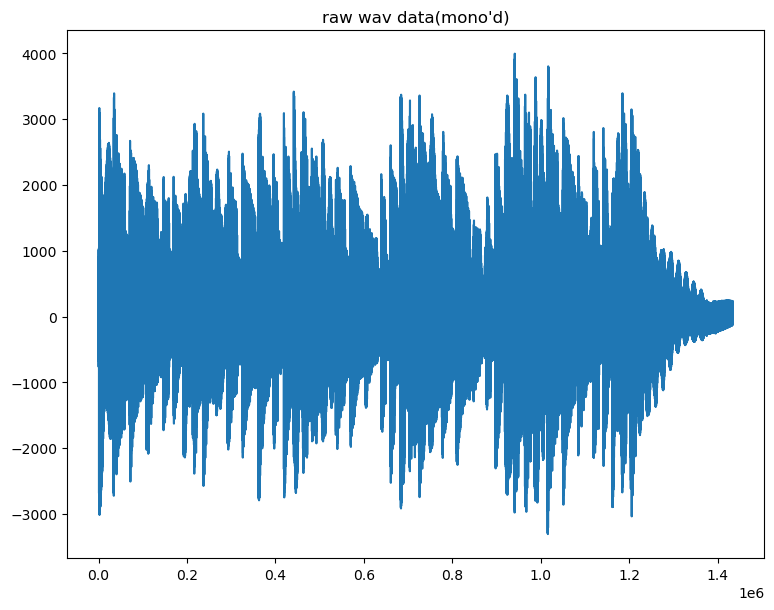

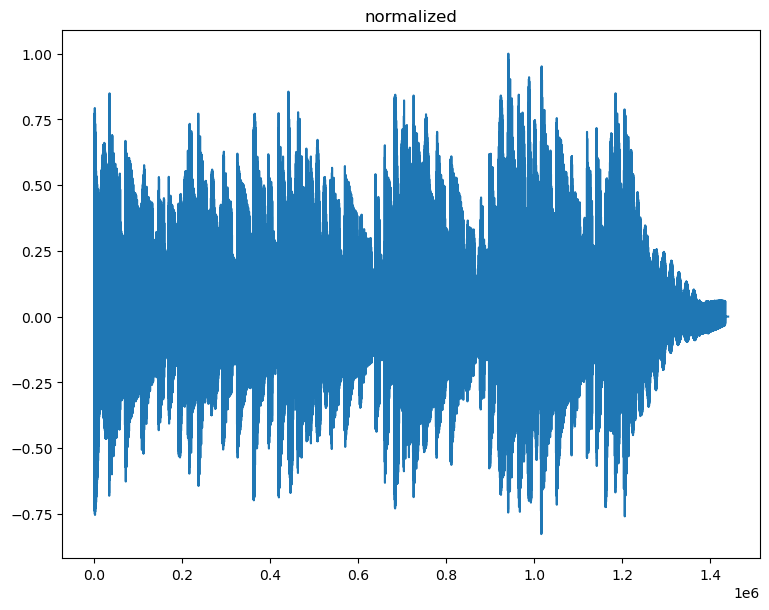

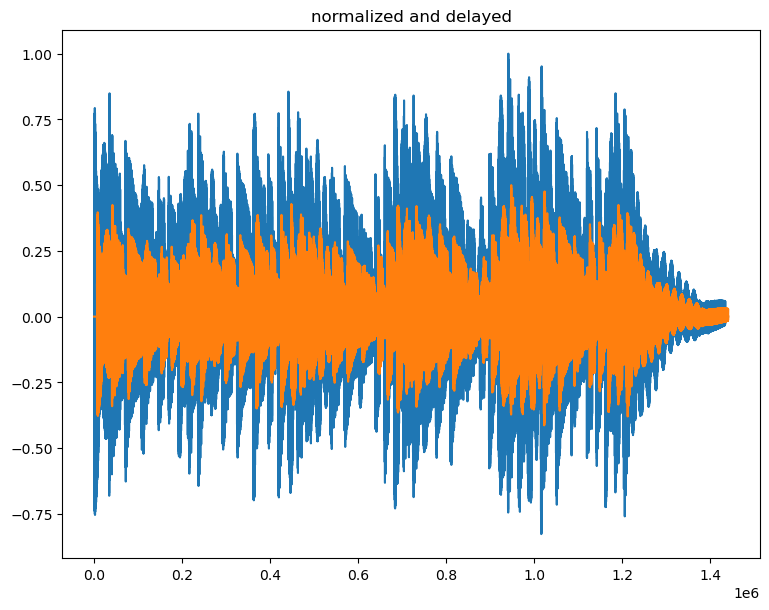

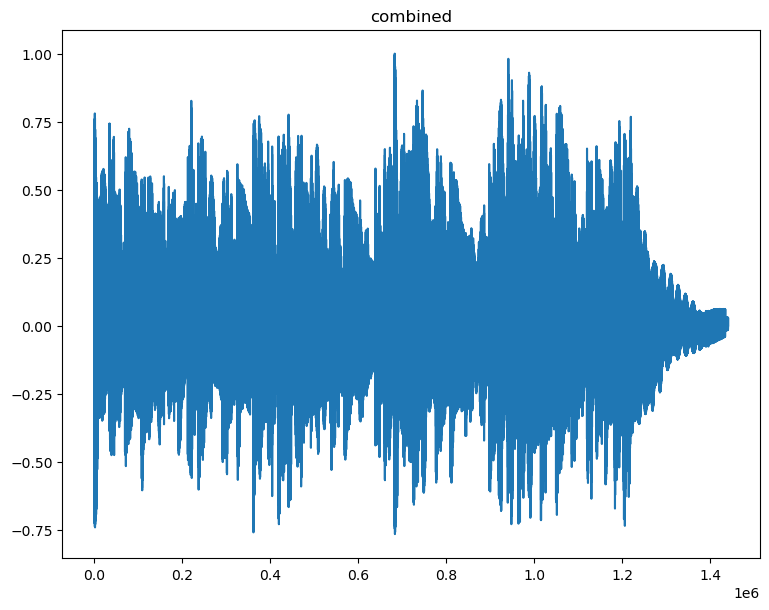

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile

# how long the echo should be audible in seconds
echoDuration = 0.15
# the amplitude/loudness of the delayed sample as factor relative to the original
delayAmplitude = 0.5

def ToMono(signal):
    '''
    Combine stereo channels to mono, if applicable ((left channel + right channel) / 2)
    '''
    if (signal.ndim >  1):
        length = signal.shape[0]
        signal = (signal[0:length:1, 0] + signal[0:length:1, 1]) / 2
    return signal

  
# Taken from "Think DSP" by Allen B. Downey:
# https://greenteapress.com/wp/think-dsp/
# https://github.com/AllenDowney/ThinkDSP
def normalize(ys, amp=1.0):
    """Normalizes a wave array so the maximum amplitude is +amp or -amp.

    ys: wave array
    amp: max amplitude (pos or neg) in result

    returns: wave array
    """
    high, low = abs(max(ys)), abs(min(ys))
    return amp * ys / max(high, low)

# Sample taken from:
# https://ccrma.stanford.edu/~jos/pasp/Sound_Examples.html
#sample = "gtr-jazz-3.wav"
sample = "untitled.wav"

# Read sample rate (in samples/sec) and data from wav file using scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
samplingRate, audioData = wavfile.read(sample)

#audioData.dtype, samplingRate

audioData = ToMono(audioData)
assert audioData.ndim == 1
# To make signal processing easier, it is ideal to scale the data representation from 
# signals to be between -1 and 1. The method "wavfile.read" returns data as signed 16 bit integers.
# To avoid losing information (integer division -> truncation), the audio data array is
# typecast to double precision float and then divided by 2^15, which is the maximum value a 16 bit int can hold (for negative values; 2^15 - 1 for positive values)
assert np.abs(np.iinfo(np.int16).min) == 2**15
#normalizedSignal = audioData / 2**15

normalizedSignal = normalize(audioData)

#normalizedSignal.shape
# convert echo duration into samples
delayInSamples = round(echoDuration * samplingRate)
# get a zeroed array the size of samples to be delayed
padding = np.zeros(delayInSamples)
# get delayed signal by padding the start of the audio signal with zeroed array
delayedSignal = np.concatenate((padding, normalizedSignal))
# now add padding to the end of the normalized audio
normalizedSignal = np.concatenate((normalizedSignal, padding))
# multiply the delayed signal with desired amplitude
delayedSignal *=  delayAmplitude
# combine both padded signals
processedSignal = np.array(normalizedSignal + delayedSignal)
# assert resulting signal is within +1.0f and -1.0f (otherwise it will result in clipping)
processedSignal = normalize(processedSignal)
# write to resulting signal to file
wavfile.write("simple_delay.wav", samplingRate, processedSignal) 
# plot signals
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

plt.figure()
plt.title("raw wav data(mono'd)")
plt.plot(audioData)

plt.figure()
plt.title("normalized")
plt.plot(normalizedSignal)

plt.figure()
plt.title("normalized and delayed")
plt.plot(normalizedSignal)
plt.plot(delayedSignal)

plt.figure()
plt.title("combined")
plt.plot(processedSignal)

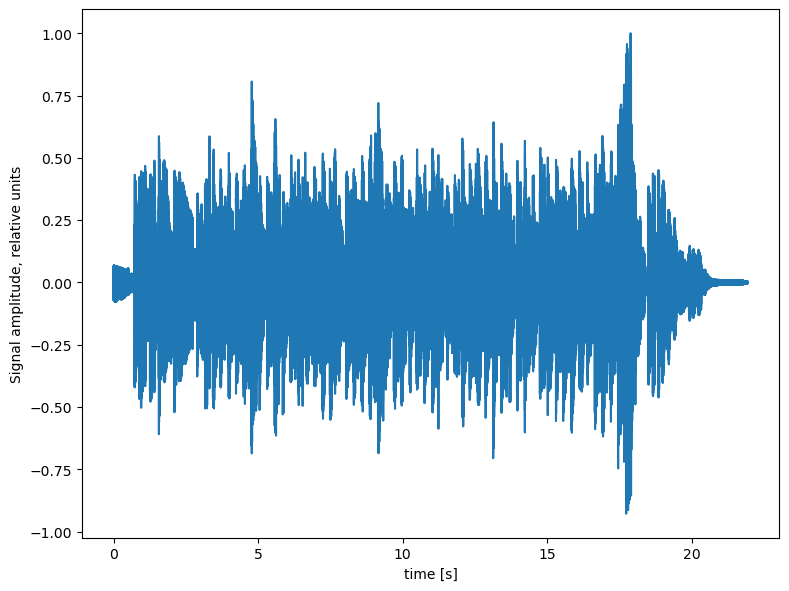

In [7]:
# plot signal against time
# to do that, get length of signal in seconds by dividing the amount of samples by the sample rate
signalLength = len(processedSignal) / samplingRate
# create evenly spaced ndarray
time = np.linspace(0, signalLength, len(processedSignal))
#print (time.shape)
#print (processedSignal.shape)

plt.figure()
plt.plot(time, processedSignal)
plt.xlabel("time [s]")
plt.ylabel("Signal amplitude, relative units")
#plt.xlim([5,7.5])
plt.show()
